<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

## Подготовка данных

In [51]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from scipy.stats import randint, uniform
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_absolute_error

from sklearn.dummy import DummyRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor


from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold

In [52]:
gold_recovery_train_new = pd.read_csv('/datasets/gold_recovery_train_new.csv')
gold_recovery_test_new = pd.read_csv('/datasets/gold_recovery_test_new.csv')
gold_recovery_full_new = pd.read_csv('/datasets/gold_recovery_full_new.csv')

Эффективность обогащения

In [53]:
c = gold_recovery_train_new['rougher.output.concentrate_au']
f = gold_recovery_train_new['rougher.input.feed_au']
t = gold_recovery_train_new['rougher.output.tail_au']
recovery = (c*(f-t))/(f*(c-t))*100

recovery_df = gold_recovery_train_new['rougher.output.recovery']

In [54]:
recovery.head()

0    87.107763
1    86.843261
2    86.842308
3    87.226430
4    86.688794
dtype: float64

In [55]:
recovery_df.head()

0    87.107763
1    86.843261
2    86.842308
3    87.226430
4    86.688794
Name: rougher.output.recovery, dtype: float64

In [56]:
for i in range(10):
    if recovery[i] !=  recovery_df[i]:
        print('Разница',i,recovery[i]-recovery_df[i])

Разница 1 1.4210854715202004e-14
Разница 2 1.4210854715202004e-14
Разница 5 1.4210854715202004e-14
Разница 6 -1.4210854715202004e-14
Разница 8 1.4210854715202004e-14
Разница 9 1.4210854715202004e-14


In [57]:
print(f'MAE:{mean_absolute_error(recovery,recovery_df)}')

MAE:9.73512347450521e-15


Погрешность крайне мала. Похоже на ошибку расчета, округление и так далее.

Признаки, недоступные в тестовой выборке

In [58]:
test_columns = gold_recovery_test_new.columns
full_columns = gold_recovery_full_new.columns
count = 0
for i in range(len(full_columns)):
    if full_columns[i] not in test_columns:
        print(full_columns[i])
        count += 1
        
print('\nКоличество',count)

final.output.concentrate_ag
final.output.concentrate_pb
final.output.concentrate_sol
final.output.concentrate_au
final.output.recovery
final.output.tail_ag
final.output.tail_pb
final.output.tail_sol
final.output.tail_au
primary_cleaner.output.concentrate_ag
primary_cleaner.output.concentrate_pb
primary_cleaner.output.concentrate_sol
primary_cleaner.output.concentrate_au
primary_cleaner.output.tail_ag
primary_cleaner.output.tail_pb
primary_cleaner.output.tail_sol
primary_cleaner.output.tail_au
rougher.calculation.sulfate_to_au_concentrate
rougher.calculation.floatbank10_sulfate_to_au_feed
rougher.calculation.floatbank11_sulfate_to_au_feed
rougher.calculation.au_pb_ratio
rougher.output.concentrate_ag
rougher.output.concentrate_pb
rougher.output.concentrate_sol
rougher.output.concentrate_au
rougher.output.recovery
rougher.output.tail_ag
rougher.output.tail_pb
rougher.output.tail_sol
rougher.output.tail_au
secondary_cleaner.output.tail_ag
secondary_cleaner.output.tail_pb
secondary_cleaner.

In [59]:
gold_recovery_train_new.columns.difference(gold_recovery_test_new.columns)

Index(['final.output.concentrate_ag', 'final.output.concentrate_au',
       'final.output.concentrate_pb', 'final.output.concentrate_sol',
       'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_au',
       'final.output.tail_pb', 'final.output.tail_sol',
       'primary_cleaner.output.concentrate_ag',
       'primary_cleaner.output.concentrate_au',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.concentrate_sol',
       'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_au',
       'primary_cleaner.output.tail_pb', 'primary_cleaner.output.tail_sol',
       'rougher.calculation.au_pb_ratio',
       'rougher.calculation.floatbank10_sulfate_to_au_feed',
       'rougher.calculation.floatbank11_sulfate_to_au_feed',
       'rougher.calculation.sulfate_to_au_concentrate',
       'rougher.output.concentrate_ag', 'rougher.output.concentrate_au',
       'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol',
       'roughe

- rougher - этап флотации
- calculation - вычисления
- sulfate_to_au_concentrate
- floatbank10_sulfate_to_au_feed
- floatbank11_sulfate_to_au_feed
- au_pb_ratio
- output
- recovery - эффективность обогащения чернового концетрата
- concentrate_.. (ag, pb, sol, au)
- tail_.. (ag, pb, sol, au)
- primary_cleaner - первый этап очистки
- output - параметры продукта
- concentrate_.. - все концетраты (ag, pb, sol, au)
- tail_.. - все концетрации в отвальных хвостах (ag, pb, sol, au)
- secondary_cleaner - второй этап очистки
- output - параметры продукта
- tail_.. (ag, pb, sol, au)
- final - финальный концетрат
- output - параметры продукта
- recovery - эффективность обогащения финального концетрата
- concentrate_.. (ag, pb, sol, au)
- tail_.. (ag, pb, sol, au)

Предобработка данных

In [60]:
df_train = gold_recovery_train_new.copy()

columns_for_train_df = gold_recovery_test_new.columns
columns_for_train_df = columns_for_train_df.union(['rougher.output.recovery','final.output.recovery'])

Проверим сколько NAN в обучающей выборке

In [61]:
print(df_train[columns_for_train_df].isna().sum().sort_values(ascending=False).head(50))

rougher.state.floatbank10_e_air               436
rougher.input.floatbank11_xanthate            428
secondary_cleaner.state.floatbank2_a_air      217
rougher.input.feed_size                       144
rougher.input.feed_pb                         100
primary_cleaner.input.xanthate                100
rougher.input.feed_sol                         78
rougher.input.floatbank11_sulfate              36
primary_cleaner.input.depressant               32
rougher.input.floatbank10_sulfate              29
secondary_cleaner.state.floatbank2_b_air       21
primary_cleaner.input.sulfate                  20
rougher.input.floatbank10_xanthate              8
rougher.input.feed_rate                         8
secondary_cleaner.state.floatbank4_a_air        6
primary_cleaner.state.floatbank8_b_air          4
secondary_cleaner.state.floatbank3_a_air        4
primary_cleaner.state.floatbank8_a_air          4
primary_cleaner.state.floatbank8_d_air          3
secondary_cleaner.state.floatbank6_a_air        2


In [62]:
df_train[columns_for_train_df] = df_train[columns_for_train_df].ffill()

In [63]:
print('Количетво явных дубликатов:', df_train.duplicated().sum())

Количетво явных дубликатов: 0


Предобработка тестовой выборки

In [64]:
df_test = gold_recovery_test_new.merge(gold_recovery_full_new[['date','rougher.output.recovery','final.output.recovery']], on='date', how='left').copy()

Проверим сколько NAN в тестовой выборке

In [65]:
print(df_test.isna().sum().sort_values(ascending=False).head(15))

rougher.input.floatbank11_xanthate            25
rougher.input.feed_sol                        21
secondary_cleaner.state.floatbank3_a_air       9
rougher.input.floatbank11_sulfate              8
primary_cleaner.input.depressant               5
rougher.input.floatbank10_sulfate              5
primary_cleaner.input.xanthate                 4
primary_cleaner.input.sulfate                  4
secondary_cleaner.state.floatbank2_a_air       3
rougher.input.feed_rate                        3
secondary_cleaner.state.floatbank2_b_air       2
rougher.input.feed_size                        1
secondary_cleaner.state.floatbank3_a_level     0
secondary_cleaner.state.floatbank3_b_level     0
secondary_cleaner.state.floatbank3_b_air       0
dtype: int64


нам нужно убрать столбец даты, чтобы он не мешал обучению модели.

In [66]:
df_test = df_test.dropna()
df_test = df_test.drop(columns='date')
df_test.reset_index(drop=True, inplace=True)

In [67]:
print('Количетво явных дубликатов:', df_test.duplicated().sum())

Количетво явных дубликатов: 0


## Анализ данных

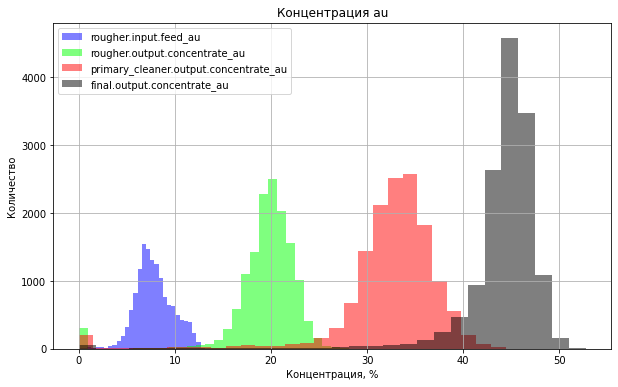

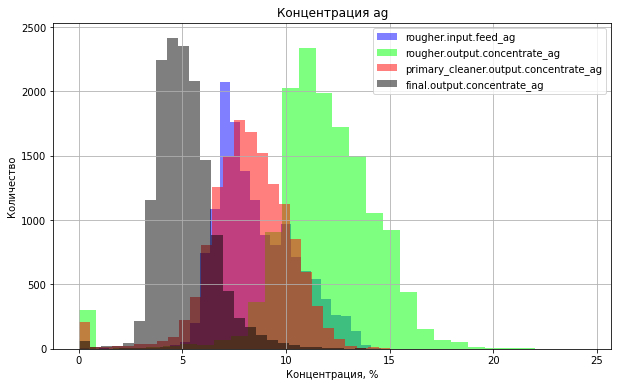

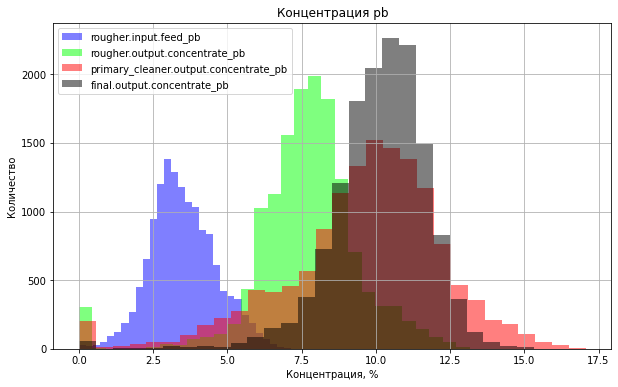

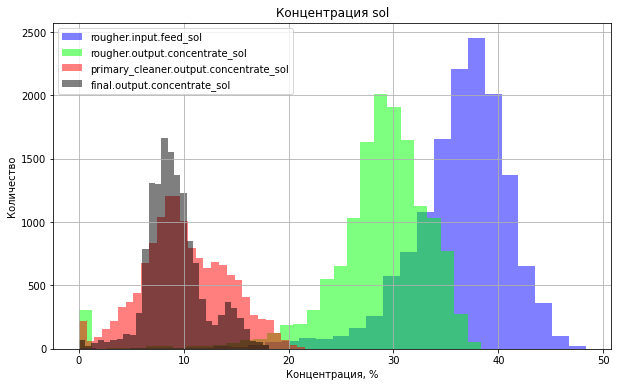

In [68]:
def display_metal_hist(df, metal, zeros=False):
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111)
    if zeros:
        print(df[df['rougher.input.feed_'+metal]==0]['rougher.input.feed_'+metal].count())
        print(df[df['rougher.output.concentrate_'+metal]==0]['rougher.output.concentrate_'+metal].count())
        print(df[df['primary_cleaner.output.concentrate_'+metal]==0]['primary_cleaner.output.concentrate_'+metal].count())
        print(df[df['final.output.concentrate_'+metal]==0]['final.output.concentrate_'+metal].count())
    df['rougher.input.feed_'+metal].hist(legend=True, bins=30, fc=(0, 0, 1, 0.5))
    df['rougher.output.concentrate_'+metal].hist(legend=True, bins=30, fc=(0, 1, 0, 0.5))
    df['primary_cleaner.output.concentrate_'+metal].hist(legend=True, bins=30, fc=(1, 0, 0, 0.5))
    df['final.output.concentrate_'+metal].hist(legend=True, bins=30, fc=(0, 0, 0, 0.5))
    ax.set_title('Концентрация '+metal)
    ax.set_xlabel('Концентрация, %')
    ax.set_ylabel('Количество')
    plt.plot()
    
display_metal_hist(df_train, 'au')
display_metal_hist(df_train, 'ag')
display_metal_hist(df_train, 'pb')
display_metal_hist(df_train, 'sol')

- Концентрация золота растет, что нормально. 
- Концентрация серебра сначала повышается, затем падает. 
- Концентрация свинца растет. 
- Концентрация SOL падает.

[]

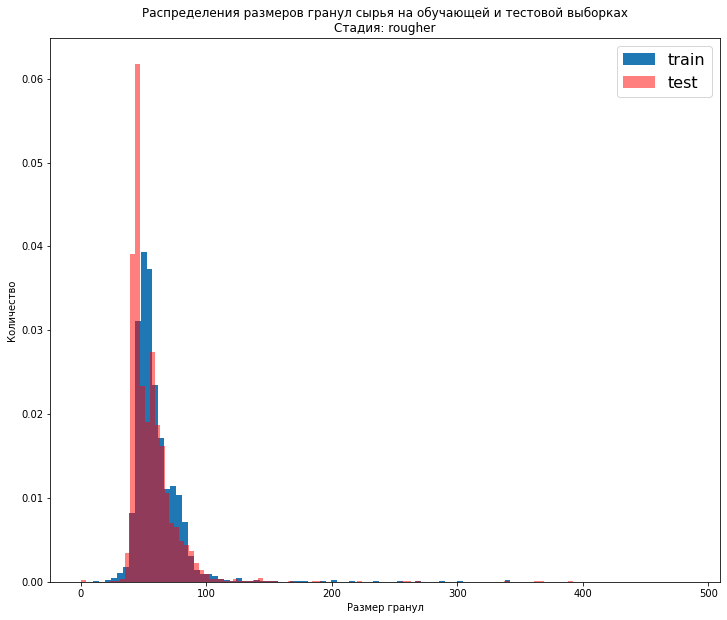

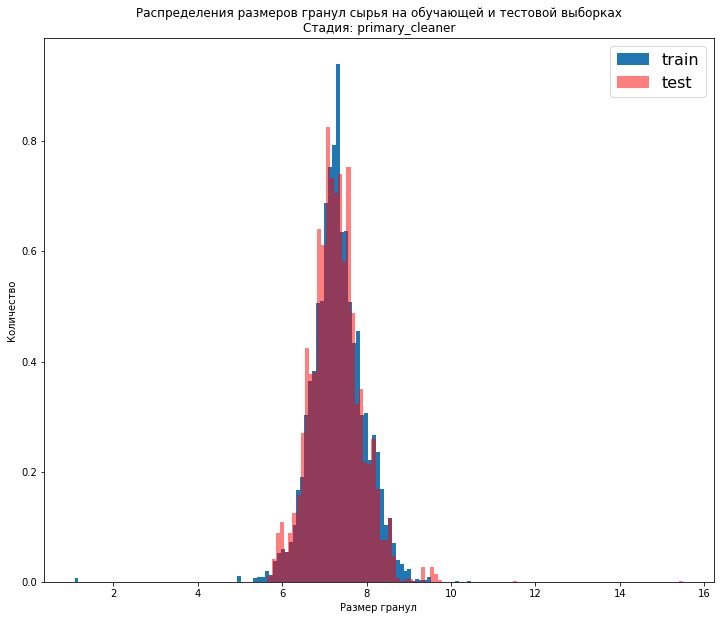

In [69]:
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111)
ax.hist(df_train['rougher.input.feed_size'],bins=100,label='train',density=True)
ax.hist(df_test['rougher.input.feed_size'],bins=100,label='test',density=True, fc=(1, 0, 0, 0.5))
ax.set_title('Распределения размеров гранул сырья на обучающей и тестовой выборках\nСтадия: rougher')
ax.set_xlabel('Размер гранул')
ax.set_ylabel('Количество')
ax.legend(fontsize=16)
plt.plot()

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111)
ax.hist(df_train['primary_cleaner.input.feed_size'],bins=100,label='train',density=True)
ax.hist(df_test['primary_cleaner.input.feed_size'],bins=100,label='test',density=True, fc=(1, 0, 0, 0.5))
ax.set_title('Распределения размеров гранул сырья на обучающей и тестовой выборках\nСтадия: primary_cleaner')
ax.set_xlabel('Размер гранул')
ax.set_ylabel('Количество')
ax.legend(fontsize=16)
plt.plot()

На гистограмме видно очень «длинный хвост» вправо. Возможно, стоит удалить значения, в которых размер зерна > 150.

В среднем имеем 7%-ную разницу в размерах гранул в обучающей выборке по сравнению с тестовой. Это значительный процент.

In [70]:
df_train = df_train.drop(
    df_train[(df_train['rougher.input.feed_size']<1) 
             | (df_train['rougher.input.feed_size']>120)].index)
df_train.reset_index(drop=True, inplace=True)

df_test = df_test.drop(
    df_test[(df_test['rougher.input.feed_size']<1) 
            | (df_test['rougher.input.feed_size']>120)].index)
df_test.reset_index(drop=True, inplace=True)

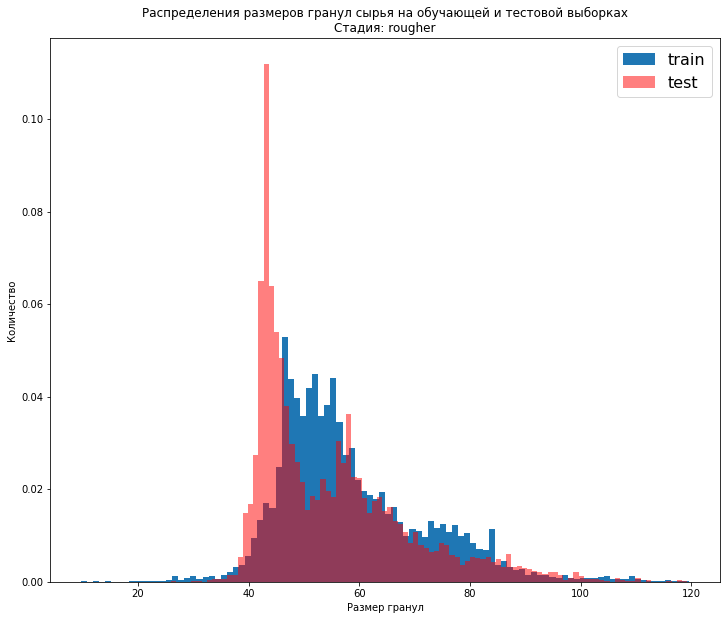

In [71]:
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111)
ax.hist(df_train['rougher.input.feed_size'],bins=100,label='train',density=True)
ax.hist(df_test['rougher.input.feed_size'],bins=100,label='test',density=True, fc=(1, 0, 0, 0.5))
ax.set_title('Распределения размеров гранул сырья на обучающей и тестовой выборках\nСтадия: rougher')
ax.set_xlabel('Размер гранул')
ax.set_ylabel('Количество')
ax.legend(fontsize=16)
plt.plot();

Распределение размера гранул на тестовой выборке выглядит плохо. Было бы лучше собрать обучающий и тестовый набор с нуля

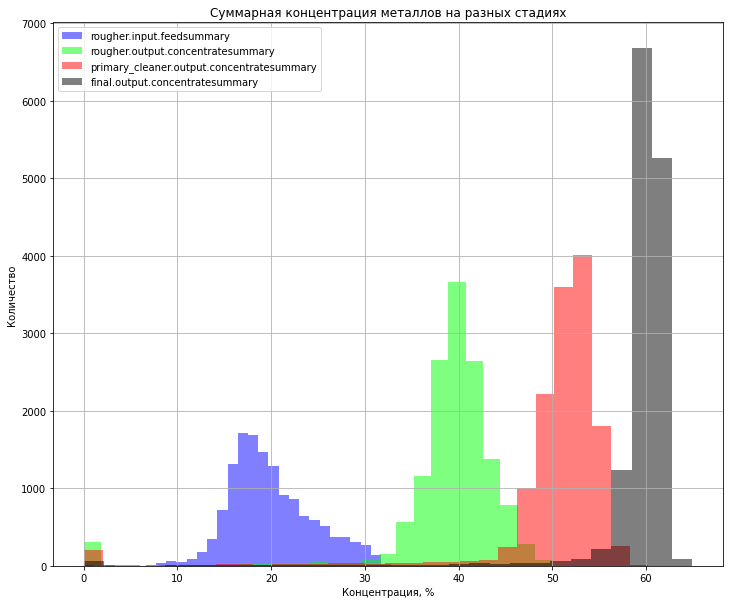

In [72]:
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111)
def display_metal_hist_sum(df, stage, fc):
    df[stage+'summary'] = (df[stage+'_au']+ df[stage+'_ag']+ df[stage+'_pb'])
    df[stage+'summary'].hist(legend=True,bins=30, fc=fc)
    ax.set_title('Суммарная концентрация металлов на разных стадиях')
    ax.set_xlabel('Концентрация, %')
    ax.set_ylabel('Количество')
    plt.plot()

display_metal_hist_sum(df_train, 'rougher.input.feed', fc=(0, 0, 1, 0.5))  
display_metal_hist_sum(df_train, 'rougher.output.concentrate', fc=(0, 1, 0, 0.5))
display_metal_hist_sum(df_train, 'primary_cleaner.output.concentrate', fc=(1, 0, 0, 0.5))
display_metal_hist_sum(df_train, 'final.output.concentrate', fc=(0, 0, 0, 0.5))

Суммарная концентрация металлов на разных стадиях заметно увеличивается

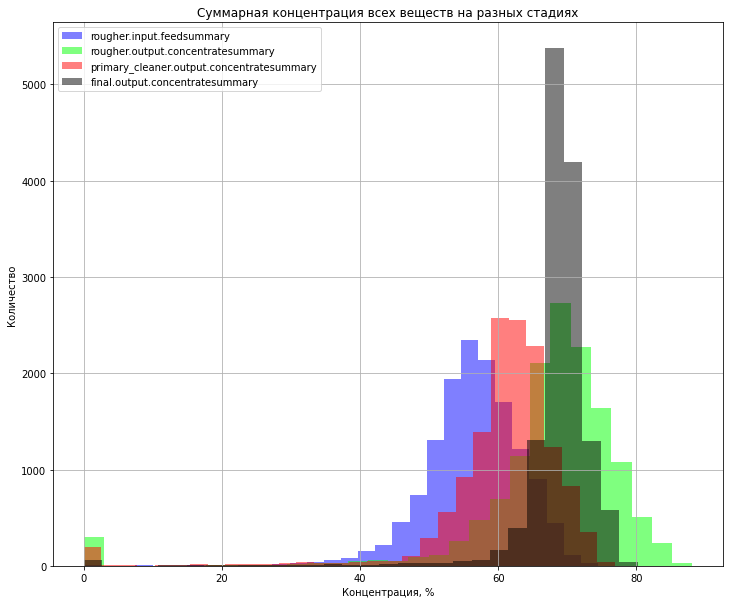

In [73]:
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111)
def display_metal_hist_sum(df, stage, fc):
    df[stage+'summary'] = (df[stage+'_au']+ df[stage+'_ag']+ df[stage+'_pb']+ df[stage+'_sol'])
    df[stage+'summary'].hist(legend=True,bins=30, fc=fc)
    ax.set_title('Суммарная концентрация всех веществ на разных стадиях')
    ax.set_xlabel('Концентрация, %')
    ax.set_ylabel('Количество')
    plt.plot()

display_metal_hist_sum(df_train, 'rougher.input.feed', fc=(0, 0, 1, 0.5))  
display_metal_hist_sum(df_train, 'rougher.output.concentrate', fc=(0, 1, 0, 0.5))
display_metal_hist_sum(df_train, 'primary_cleaner.output.concentrate', fc=(1, 0, 0, 0.5))
display_metal_hist_sum(df_train, 'final.output.concentrate', fc=(0, 0, 0, 0.5))

Суммарная концентрация всех металлов, включая SOL, также растет, но не так существенно и имеет небольшой разброс.

In [74]:
stages = ['rougher.input.feed'
         ,'rougher.output.concentrate'
         ,'primary_cleaner.output.concentrate'
         ,'final.output.concentrate']

components = ['_au'
             ,'_ag'
             ,'_pb'
             ,'_sol']

for stage in stages:
    for component in components:
        df_train = df_train.drop(df_train[df_train[stage+component]<1].index)

df_train.reset_index(drop=True, inplace=True)

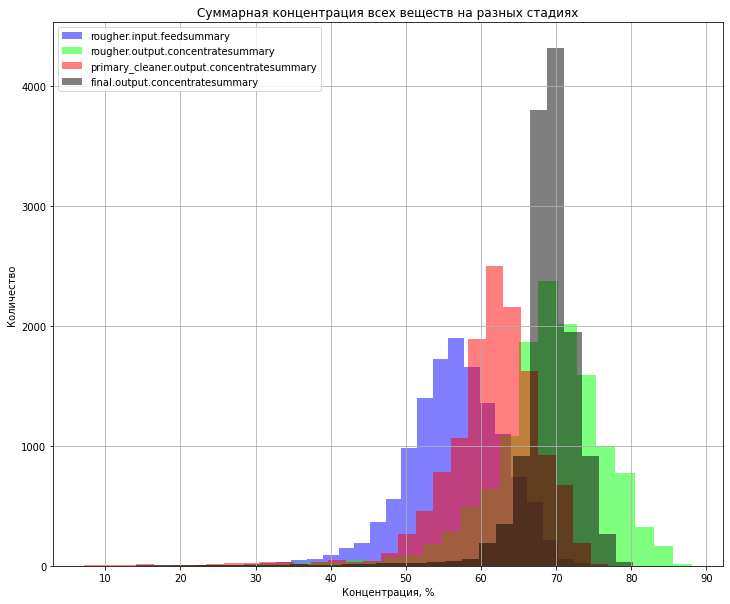

In [75]:
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111)
def display_metal_hist_sum(df, stage, fc):
    df[stage+'summary'] = (df[stage+'_au']+ df[stage+'_ag']+ df[stage+'_pb']+ df[stage+'_sol'])
    df[stage+'summary'].hist(legend=True,bins=30, fc=fc)
    ax.set_title('Суммарная концентрация всех веществ на разных стадиях')
    ax.set_xlabel('Концентрация, %')
    ax.set_ylabel('Количество')
    plt.plot()

display_metal_hist_sum(df_train, 'rougher.input.feed', fc=(0, 0, 1, 0.5))  
display_metal_hist_sum(df_train, 'rougher.output.concentrate', fc=(0, 1, 0, 0.5))
display_metal_hist_sum(df_train, 'primary_cleaner.output.concentrate', fc=(1, 0, 0, 0.5))
display_metal_hist_sum(df_train, 'final.output.concentrate', fc=(0, 0, 0, 0.5))

## Модель

In [76]:
def smape(A, F): #attribute, forecast
    return 100/len(A) * np.sum(2 * np.abs(F - A) / (np.abs(A) + np.abs(F)))

In [77]:
def total_smape(smape_r,smape_f):
    return np.abs(0.25*smape_r+0.75*smape_f)

In [78]:
smape_scorer = make_scorer(smape, greater_is_better=False)

In [79]:
df_train_features = df_train[columns_for_train_df]
df_train_features = df_train_features.drop(['date', 'rougher.output.recovery','final.output.recovery'], axis=1)

df_train_target_rougher = df_train['rougher.output.recovery']
df_train_target_final = df_train['final.output.recovery']

print(df_train_features.shape)
print(df_train_target_rougher.shape)
print(df_train_target_final.shape)

(13225, 52)
(13225,)
(13225,)


In [80]:
df_test_features = df_test.drop(['rougher.output.recovery','final.output.recovery'], axis=1)
df_test_target_rougher = df_test['rougher.output.recovery']
df_test_target_final = df_test['final.output.recovery']
print(df_test_features.shape)
print(df_test_target_rougher.shape)
print(df_test_target_final.shape)

(5180, 52)
(5180,)
(5180,)


In [81]:
df_test_features = df_test_features[df_train_features.columns]

<b>Linear regression</b>

Прогноз обогащения в сыром

In [82]:
%%time
model = LinearRegression()

scores = cross_val_score(model
                , df_train_features
                , df_train_target_rougher
                , scoring = smape_scorer
                , cv=20)

smape_r = scores.mean()

print(f'Rougth sMAPE: {np.abs(smape_r)}%')

Rougth sMAPE: 5.5053609357032744%
CPU times: user 4.02 s, sys: 5.82 s, total: 9.84 s
Wall time: 9.83 s


Прогнозирование обогащения в конечном

In [83]:
%%time
model = LinearRegression()

scores = cross_val_score(model
                , df_train_features
                , df_train_target_final
                , scoring = smape_scorer
                , cv=20)

smape_f = scores.mean()


print(f'Final sMAPE: {np.abs(smape_f)}%')

Final sMAPE: 9.020958388125122%
CPU times: user 4.41 s, sys: 6.12 s, total: 10.5 s
Wall time: 10.5 s


In [84]:
print('Итоговое sMAPE:', total_smape(smape_r,smape_f))

Итоговое sMAPE: 8.142059025019659


<b>DummyRegressors</b>

In [85]:
model = DummyRegressor()

scores = cross_val_score(model
                , df_train_features
                , df_train_target_rougher
                , scoring = smape_scorer
                , cv=20)

dummy_smape_r = scores.mean()


print(f'dummy_smape_r: {dummy_smape_r}%')

model = DummyRegressor()

scores = cross_val_score(model
                , df_train_features
                , df_train_target_final
                , scoring = smape_scorer
                , cv=20)

dummy_smape_f = scores.mean()

print(f'dummy_smape_f: {dummy_smape_f}%')

print()
print(f'Итоговое Dummy sMAPE: {total_smape(dummy_smape_r,dummy_smape_f)}%')

dummy_smape_r: -7.368897569666956%
dummy_smape_f: -10.016293341575425%

Итоговое Dummy sMAPE: 9.354444398598307%


<b>Random forest</b>

Прогноз обогащения в сыром концентрате

In [86]:
%%time

param = {
    'n_estimators': [1,5,9], 
    'max_depth': [1,5,9], 
    'min_samples_leaf': [1,40,70]
}


model = RandomForestRegressor(random_state=12345)

randomsearch = RandomizedSearchCV(model
                                  , param_distributions=param
                                  , n_iter=10
                                  , cv=3
                                  , n_jobs=-1
                                  , scoring = smape_scorer
                                  , return_train_score=True
                                  , random_state=12345)

randomsearch.fit(df_train_features, df_train_target_rougher)
print('Best score:', randomsearch.best_score_)
print('Best params:', randomsearch.best_params_)

Best score: -7.4849938295472205
Best params: {'n_estimators': 1, 'min_samples_leaf': 40, 'max_depth': 9}
CPU times: user 15.2 s, sys: 193 ms, total: 15.4 s
Wall time: 15.5 s


In [87]:
%%time

model = RandomForestRegressor(random_state=12345
                      , max_depth=9
                      , min_samples_leaf=40
                      , n_estimators=1)

scores = cross_val_score(model
                , df_train_features
                , df_train_target_rougher
                , scoring = smape_scorer
                , cv=20)

smape_r = scores.mean()

print(f'Rougher sMAPE: {smape_r}%')

Rougher sMAPE: -6.3713630518237645%
CPU times: user 5.58 s, sys: 64.8 ms, total: 5.64 s
Wall time: 5.76 s


Прогнозирование обогащения в конечном концентрате

In [88]:
%%time

param = {
    'n_estimators': [1,5,9], 
    'max_depth': [1,5,9], 
    'min_samples_leaf': [1,40,70]
}


model = RandomForestRegressor(random_state=12345)

randomsearch = RandomizedSearchCV(model
                                  , param_distributions=param
                                  , n_iter=10
                                  , cv=3
                                  , n_jobs=-1
                                  , scoring = smape_scorer
                                  , return_train_score=True
                                  , random_state=12345)

randomsearch.fit(df_train_features, df_train_target_final)
print('Best score:', randomsearch.best_score_)
print('Best params:', randomsearch.best_params_)

Best score: -9.674937458333273
Best params: {'n_estimators': 9, 'min_samples_leaf': 70, 'max_depth': 1}
CPU times: user 16 s, sys: 216 ms, total: 16.3 s
Wall time: 16.3 s


In [89]:
%%time

model = RandomForestRegressor(random_state=12345
                      , max_depth=1
                      , min_samples_leaf=70
                      , n_estimators=9)

scores = cross_val_score(model
                , df_train_features
                , df_train_target_final
                , scoring = smape_scorer
                , cv=20)

smape_f = scores.mean()

print(f'Final sMAPE: {np.abs(smape_f)}%')

Final sMAPE: 9.060385372845284%
CPU times: user 8.16 s, sys: 95.1 ms, total: 8.25 s
Wall time: 8.26 s


In [90]:
print('Итоговое sMAPE:', total_smape(smape_r,smape_f))

Итоговое sMAPE: 8.388129792589904


Лучшая модель на тестовой выборке

In [91]:
model = LinearRegression()
model.fit(df_train_features, df_train_target_rougher)
predictions = model.predict(df_test_features)
smape_r = smape(predictions,df_test_target_rougher)


model.fit(df_train_features, df_train_target_final)
predictions = model.predict(df_test_features)
smape_f = smape(predictions,df_test_target_final)


print(f'sMAPE: {smape_r}%')
print(f'sMAPE: {smape_f}%')

print(f'LinearRegression Итоговое sMAPE: {total_smape(smape_r,smape_f)}%')

sMAPE: 8.594064334603225%
sMAPE: 8.91894069802991%
LinearRegression Итоговое sMAPE: 8.83772160717324%


Для улучшения:
- попытаться определить несущественные признаки
- по-другому подойти к вопросу выбора признаков для обучения, например, разделить признаки разных стадий обогащения для двух наших моделей